# [SOC-88] Practice with Visualizations

### Professor David Harding

## Table of Contents

[Introduction](#intro)

[Using Tables with Bigger Data](#1)
- [Question 1: Who is Represented?](#q1)
- [Question 2: Differences by Race](#q2)
- [Question 3: Minimum Sentence Lengths](#q3)
- [Question 4: Sentence Lengths across Different Sentence Types](#q4)
- [Bonus: Sentence Lengths across different races](#bonus)
    - [Bonus Challenge Question](#bonusq)

## Introduction <a id='intro'></a>

Welcome to the notebook! 

In this notebook, we'll be exploring data visualizations with data from one of Professor Harding's papers.

We will use the `datascience` library which is a library in Python that we can use to manage data, but this could be done with other libraries such as [pandas](https://pandas.pydata.org/). The datascience library holds data in structures called Tables.

To use the library, we have to import it. We'll also import numpy as np. For data visualization, we will be using the library [matplotlib](https://matplotlib.org/). We'll import this as plt for ease of use.


In [1]:
# Data library
from datascience import *

import numpy as np

# Plotting libraries
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

Great! Let's explore the different ways we can use Tables to create data visualizations.


## Using Tables with Bigger Data <a id='1'></a>

Let's explore some ways to manage bigger data and break it down into something we can visualize.

First, we need some big data. Here, we'll use some data from Professor Harding's own research about the [*Short- and long-term effects of imprisonment on future felony convictions and prison admissions*](https://www.ncbi.nlm.nih.gov/pubmed/28973924).

This dataset contains information about people who were sentenced in Michigan between 2003 and 2006. It contains information such as the judge id number, sentence date, sentencing type, age of the person sentenced and other important variables. You can see what each column corresponds to in the codebook below.

#### <center>Codebook</center>

|Column Name   | Description |
|:------------:|:---------|
|SCRSIDs |Individual defendant ID|
|r_judge_id |Judge ID|
|r_sendate | Date of sentence|
|alt_start_date_all | Date of first exposure to community (Sentence data for probationers or release date for those sentenced to prison or jail)|
|cum_min_length_months | Minimum sentence imposed by the judge (in months) |
|sent_type | Type of Sentence (Prison, Probation, Jail only, Jail followed by Probation)|
|pre_employ23 |Proportion of the 23 calendar quarters prior to sentence in which the individual had any employment in the formal labor market |
|pre_employ12 |Proportion of the 12 calendar quarters prior to sentence in which the individual had any employment in the formal labor market|
|r_age | Age in years |
|race_cat | Race in categories |

To load the data, we will use `Table().read_table("name of csv file")` which reads a .csv file into Python.

In [2]:
sentencing = Table().read_table("harding_new.csv")
sentencing

SCRSIDs,r_judge_id,r_sendate,alt_start_date_all,cum_min_length_months,sent_type,pre_employ23,pre_employ12,r_age,race_cat
20000,88,2003-08-18,2004-06-17,12,Jail Only,0.0869565,0.166667,72,Other Race
20001,600,2003-07-18,2008-10-16,180,Prison,0,0,75,Black
20003,168,2005-07-12,2006-01-03,24,Jail with Probation,0,0,73,White
20004,504,2003-08-18,2003-09-15,18,Jail with Probation,0,0,75,White
20005,70,2004-02-26,2004-02-28,12,Jail with Probation,0,0,68,Black
20006,5,2003-08-14,2003-08-14,12,Jail with Probation,0,0,70,Black
20007,1,2003-09-09,2003-09-09,12,Probation,1,1,68,Black
20008,84,2006-04-03,2006-09-29,36,Jail with Probation,0,0,72,Black
20009,66,2004-08-10,2005-07-04,24,Jail with Probation,0.0434783,0.0833333,68,White
20010,104,2003-11-05,2004-02-02,3,Jail Only,0.652174,0.416667,66,Black


### Question 1: Who is represented? <a id='q1'></a>

Cool, now we have data. Let's see if we can figure out the following questions:
- Who is represented in this dataset? Groups or individuals?
- What does each row of the table represent? And, how many people are represented in this dataset?


Write in the cell below any code that you would need to answer the questions above. 

**Write your comment here**

In [3]:
# write any code here

**Example Solution:** Each row in the table represents an individual in Michigan who was sentenced to serve in jail, prison, probation or some other combination between 2003 and 2006. There are 140,267 people in represented in this population of sentenced individuals. This is a population because it includes everyone sentenced for a felony in Michigan from 2003-2006.

In [4]:
# example solution
sentencing.num_rows

140267

When starting to analyze your data, it is good to think about how many unique values exist in your dataset. The following code checks how many unique values there are in each column of your table. A way to understand what these numbers mean is if there are 140,267 unique values and there are 140,267 rows in our table, then that means every value in that column is unique.

In [5]:
for i in sentencing.labels:
    print('Number of unique values in column',i,":", len(np.unique(sentencing.column(i))))

Number of unique values in column SCRSIDs : 140267
Number of unique values in column r_judge_id : 393
Number of unique values in column r_sendate : 1142
Number of unique values in column alt_start_date_all : 3171
Number of unique values in column cum_min_length_months : 232
Number of unique values in column sent_type : 5
Number of unique values in column pre_employ23 : 1703
Number of unique values in column pre_employ12 : 1692
Number of unique values in column r_age : 76
Number of unique values in column race_cat : 4


For columns with low numbers of unique values, it is useful to try to group them and determine which plot is best to plot the differences between the groups. Let's try with `race_cat` first, and then for other variables.

To group by the `race_cat` column, we use the `table.group()` function. We will define this new table as `race_categories`.

In [6]:
race_categories = sentencing.group('race_cat')
race_categories

race_cat,count
Black,56393
Other Race,2270
Race Unknown,282
White,81322


### Question 2: Differences by Race <a id='q2'></a>

Let's represent this data to see the disparities between races. We have one categorical variable and one numerical variable. Here is an example plot:

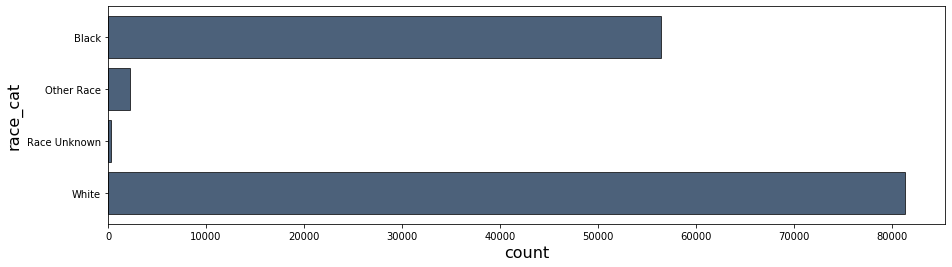

In [7]:
race_categories.barh('race_cat', width=15)

Now, it is your turn! Improve this bar chart with the methods from the first notebook. Then, describe why you choose to add or not add certain features to the chart. Think about fonts, colors, titles, clear labeling, avoiding too much "ink". Be prepared to explain your design choices below!

In [8]:
# your code here

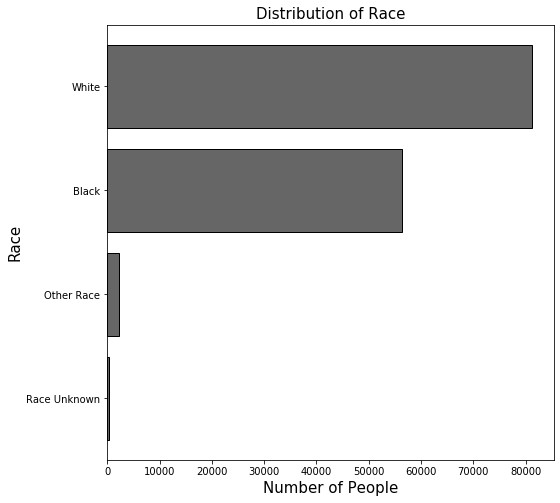

In [9]:
## POSSIBLE SOLUTION ##

# SORT DATA
sorted_race_table = race_categories.sort('count', descending=False)

# INITIALIZE PLOT
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

# BAR CHART
plt.barh(sorted_race_table.column('race_cat'), sorted_race_table.column("count"), color='0.4')

# AXES
ax.set_xlabel('Number of People', fontsize=15)
ax.set_ylabel('Race', fontsize=15)
ax.set_title("Distribution of Race", fontsize=15);

**Desribe the features you choose.** What does your plot argue? What is the main point? What is the general message of the plot?

*Type your answer here*

**Example Solution:** I choose a large figure so that the image would be readable, and I sorted by the number of occurrences so that I could compare the differences between groups better.

One thing to consider when grouping by race is that the data we have is for all individuals sentenced in Michigan between 2003 and 2006. This is the race breakdown for those who were sentenced, but it is important to also look at the race breakdown of the overall Michigan population. In order to do this, we will look at the [Michigan Census Data](https://www.census.gov/prod/2002pubs/c2kprof00-mi.pdf) from 2000. In the following table, we've included both the count and percentage for the race categories White, Black, and Other (includes people of multiple races).

In [10]:
races = ['Black', 'Other', 'White']
counts = [1412742, 559649, 7966053]
percent = [14.2, 5.3, 80.5]
race_census = Table().with_columns('Race', races, 'Count', counts, 'Percent', percent)
race_census

Race,Count,Percent
Black,1412742,14.2
Other,559649,5.3
White,7966053,80.5


The table `race_full` below contains both the sentencing counts and the census counts, along with the percentage of the population sentenced for each race. We will use this to show the differences in race for the individuals sentenced.

In [11]:
race_sentencing = race_categories.where('race_cat', are.not_equal_to('Race Unknown'))
race_full = race_sentencing.with_column('census_count', race_census['Count']).relabeled('count', 'sentencing_count')
race_full = race_full.with_column('sentenced_pct', race_full['sentencing_count']/race_full['census_count']*100)
race_full

race_cat,sentencing_count,census_count,sentenced_pct
Black,56393,1412742,3.99174
Other Race,2270,559649,0.405611
White,81322,7966053,1.02086


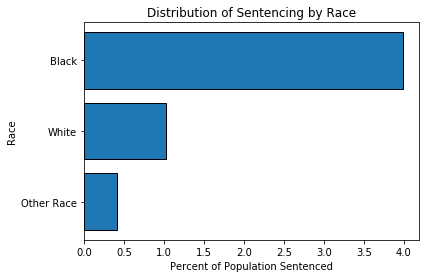

In [12]:
race_full_sorted = race_full.sort('sentenced_pct', False)
plt.barh(race_full_sorted['race_cat'], race_full_sorted['sentenced_pct'])
plt.title('Distribution of Sentencing by Race')
plt.xlabel('Percent of Population Sentenced')
plt.ylabel('Race');

**Question:** What do you notice that is different about this plot than the plot you created with the sentencing counts? What does this tell us about context and population size when creating visualizations?

*Type your answer here*

**Example Solution:** When looking at the percentages, we see that black individuals have a higher sentincing percentage than white individuals, even though the count of white individuals sentenced is more than the black. This is because white individuals make up more than 80% of the Michigan population, while black individuals make up only about 14% of the population.

### Question 3: Minimum Sentence Lengths <a id='q3'></a>

Now, let's investigate the distribution of `cum_min_length_months` across different sentence types. What type of graph should we use?  Here is an example of a  plot that looks at all `cum_min_length_months`. It is very skewed, because there are some outliers in our data. Recall that the y-axis represents the counts of people, not the percent per unit.

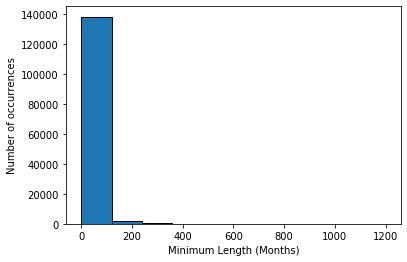

In [13]:
plt.hist(sentencing.column('cum_min_length_months'))
plt.xlabel("Minimum Length (Months)")
plt.ylabel("Number of occurrences");

**3a.** How could we find the outliers in our dataset? Let's define outliers as months where the number of occurrences are below 200. What is the largest minimum length that has over 200 occurrences? To start, we've grouped the occurrences of `cum_min_length_months`. Build off of the existing code to find the largest number of months that has a count over 200.

In [ ]:
sentencing.group('cum_min_length_months')...

In [15]:
# SOLUTION #
sentencing.group('cum_min_length_months').where('count', are.above(200)).sort(0, True)

cum_min_length_months,count
180,269
120,442
108,229
96,209
84,358
72,407
60,9323
51,307
48,2166
42,467


**3b.** We've plotted the original data with new bins to compare this distribution to one without outliers. Plot the same data below with bins widths of 20, but filter out minimum sentence lengths over 180 months. Make sure to contain the bin from 160 to 180. Hint: *Use the `bins` argument of histograms to display only part of the data.* 

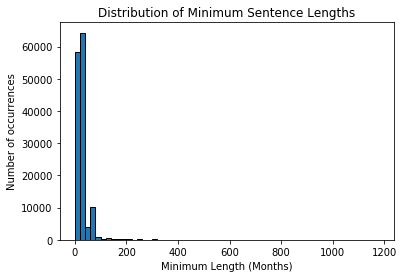

In [16]:
# GIVEN #
plt.hist(sentencing.column('cum_min_length_months'), bins=np.arange(0, 1200,20))
plt.xlabel("Minimum Length (Months)")
plt.ylabel("Number of occurrences")
plt.title('Distribution of Minimum Sentence Lengths');

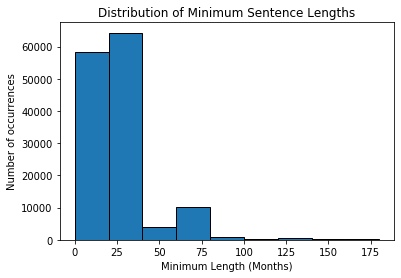

In [17]:
# SOLUTION #
plt.hist(sentencing.column('cum_min_length_months'), bins=np.arange(0, 181, 20))
plt.xlabel("Minimum Length (Months)")
plt.ylabel("Number of occurrences")
plt.title('Distribution of Minimum Sentence Lengths');

### Question 4: Sentence Lengths across Different Sentence Types  <a id='q4'></a>

To compare the different types of sentences and their lengths, we will have to filter tables so that they only contain one sentencing type and then create a histogram of the lengths within that table. You will need to make 4 different tables for the different sentence types: 'Jail Only', 'Jail with Probation', 'Prison', and 'Probation'. We will ignore the other sentence category, since there are very few people represented.

To create these subtables, you will need to use `tbl.where(...)` from Data 8. If you get stuck on the syntax, please reference [here](http://data8.org/sp20/python-reference.html) for more on how to use the function. 



**4a.** We have provided the start to most of these plots, but they are missing the proper bins and labels. Please add to them! For the sake of comparison, ignore outliers (focus on months from 0 to 150), and make all of your plots have the same bins, so we can compare across all sentence types. Choose to represent counts or density in your plot, and explain your decision in the text box after the graphs.

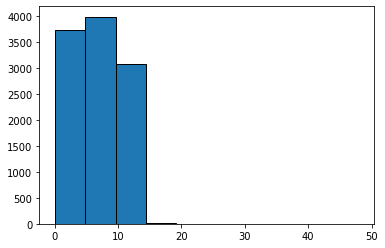

In [18]:
jail_only = sentencing.where('sent_type', 'Jail Only')
plt.hist(jail_only.column('cum_min_length_months'));

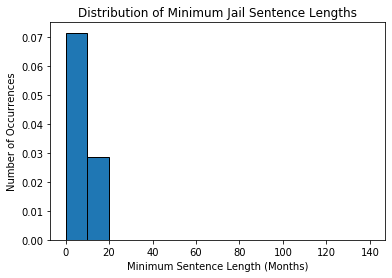

In [19]:
# SOLUTION #
plt.hist(jail_only.column('cum_min_length_months'), density=True, bins=np.arange(0,150,10));
plt.xlabel("Minimum Sentence Length (Months)")
plt.ylabel("Number of Occurrences")
plt.title('Distribution of Minimum Jail Sentence Lengths');

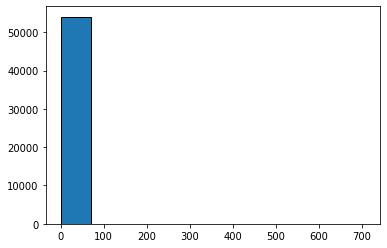

In [20]:
jail_prob = sentencing.where('sent_type', 'Jail with Probation')
plt.hist(jail_prob.column('cum_min_length_months'));

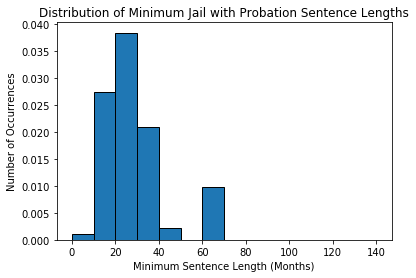

In [21]:
# SOLUTION #
plt.hist(jail_prob.column('cum_min_length_months'), density=True, bins=np.arange(0,150,10))
plt.xlabel("Minimum Sentence Length (Months)")
plt.ylabel("Number of Occurrences")
plt.title('Distribution of Minimum Jail with Probation Sentence Lengths');

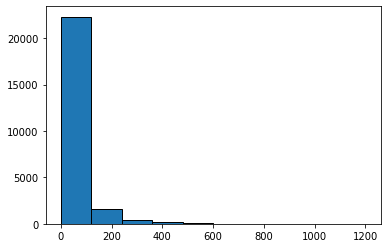

In [22]:
prison = sentencing.where('sent_type', 'Prison')
plt.hist(prison.column('cum_min_length_months'));

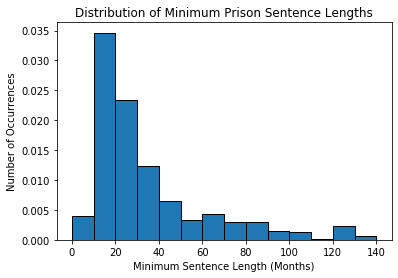

In [23]:
# SOLUTION #
plt.hist(prison.column('cum_min_length_months'), density=True, bins=np.arange(0,150,10))
plt.xlabel("Minimum Sentence Length (Months)")
plt.ylabel("Number of Occurrences")
plt.title('Distribution of Minimum Prison Sentence Lengths');

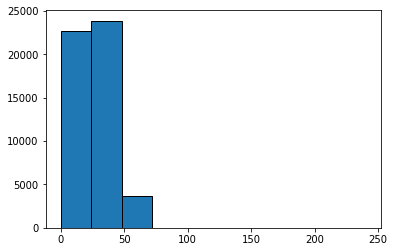

In [24]:
probation = sentencing.where('sent_type', 'Probation')
plt.hist(probation.column('cum_min_length_months'));

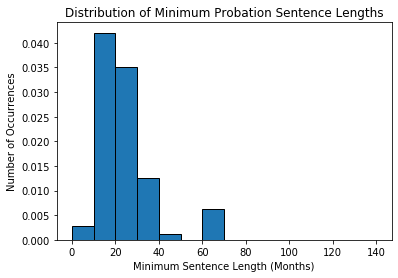

In [25]:
# SOLUTION #
plt.hist(probation.column('cum_min_length_months'), density=True, bins=np.arange(0,150,10));
plt.xlabel("Minimum Sentence Length (Months)")
plt.ylabel("Number of Occurrences")
plt.title('Distribution of Minimum Probation Sentence Lengths');

**Desribe the features you choose below.** Think about the choices you made regarding fonts, colors, titles, clear labeling. Why did you choose what you did? How does this help your plot give a message? What is the type of message this plot gives?

*Type your answer here*

**Example Solution:** I added the proper labels, and displayed the density of the population to have a better comparison across the different groups of sentence types. Each group had a different number of occurrences, so it is easier to compare the proportion of occurrences than the number.

**4b.** What do we learn from these graphs? Which sentence type has the longest lengths? How do these plots compare with the cumulative plot?

*Type your answer here*

### [Bonus] Sentence Lengths across different Races <a id='bonus'></a>

Another thing we can compare is the length of sentences based on race. Here we've plotted the distribution of sentence lengths for white and black individuals.

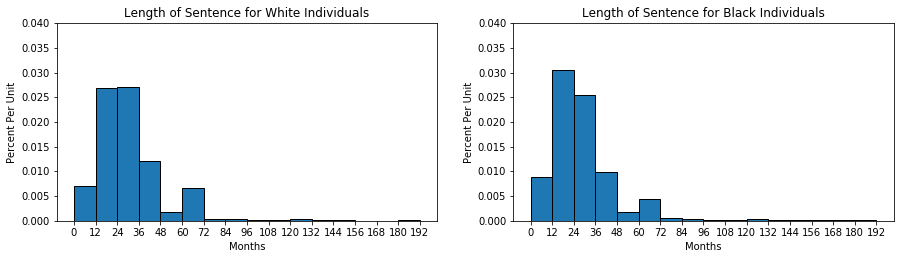

In [26]:
white_sentence_lengths = sentencing.where('race_cat', 'White') 
black_sentence_lengths = sentencing.where('race_cat', 'Black') 

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(221)
plt.hist(white_sentence_lengths.column('cum_min_length_months'), bins=np.arange(0,200,12), density=True)
plt.ylim(0, 0.04)
ax.set(title='Length of Sentence for White Individuals', xlabel = 'Months', ylabel='Percent Per Unit',
      xticks = np.arange(0,200,12))

ax1 = fig.add_subplot(222)
plt.hist(black_sentence_lengths.column('cum_min_length_months'), bins=np.arange(0,200,12), density=True)
plt.ylim(0, 0.04)
ax1.set(title='Length of Sentence for Black Individuals', xlabel = 'Months', ylabel='Percent Per Unit',
       xticks = np.arange(0,200,12));

#### Bonus Challenge Question <a id='bonusq'></a>

How would you improve upon this data visualization of two side by side histograms comparing sentence length between races?

*Type your answer here*

One possible way to visualize the length of sentence for different races is with a superimposed kernel density estimate plot. Below, we've generated a KDE with seaborn. What do you notice?

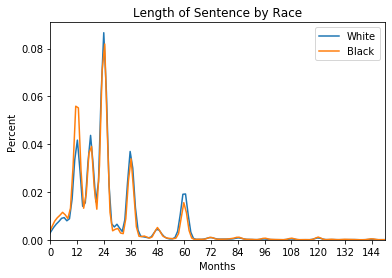

In [27]:
import seaborn as sns

sns.kdeplot(white_sentence_lengths.column('cum_min_length_months'), gridsize=1000, label = 'White')
sns.kdeplot(black_sentence_lengths.column('cum_min_length_months'), gridsize=1000, label = 'Black')
plt.xlim(0,150)
plt.title('Length of Sentence by Race')
plt.xlabel('Months')
plt.ylabel('Percent')
plt.xticks(np.arange(0,150,12));

### You made it to the end!

---

Notebook developed by: Ollie Downs, Ashley Quiterio, Keilyn Yuzuki

Data Science Modules: http://data.berkeley.edu/education/modules

Data Science Offerings at Berkeley: https://data.berkeley.edu/academics/undergraduate-programs/data-science-offerings

